In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv('car_price_prediction.csv')

In [81]:
df.head()

,manufacturer,model,category,leather_interior,fuel_type,mileage,gear_box_type,drive_wheels,wheel,color,price,levy,engine_volume,cylinders,airbags,car_age,price_per_mileage,engine_power,brand_mean_price,model_mean_price
2,16,347,3,0,4,2493,3,1,1,1,8467,0,1.3,4.0,2,19,3.394948,5.2,11663.516255,11243.486683
3,12,334,4,1,2,1954,0,0,0,14,3607,862,2.5,4.0,0,14,1.845013,10.0,12815.971795,9317.342342
4,16,347,3,1,4,5679,0,1,0,12,11726,446,1.3,4.0,4,11,2.064437,5.2,11663.516255,11243.486683
5,17,683,4,1,1,1778,0,1,0,14,39493,891,2.0,4.0,4,9,22.199550,8.0,19182.035607,30727.728324
6,43,616,3,1,2,3046,0,1,0,14,1803,761,1.8,4.0,12,15,0.591730,7.2,12774.138832,11415.997087


## DATA Wrangling

In [4]:
df.shape

(19237, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [8]:
'''
its easier that the col names to be in lowercase and if their is spaces replace it with _
'''
df.columns=df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['id', 'price', 'levy', 'manufacturer', 'model', 'prod._year',
       'category', 'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags'],
      dtype='object')

In [9]:
df=df.rename(columns={'prod._year':'prod_year'})

In [10]:
# check duplicates 
df.duplicated().sum()

np.int64(313)

In [11]:
full_duplicates = df[df.duplicated()]
print(full_duplicates)

# Count them
print("Number of full duplicates:", df.duplicated().sum())

             id  price  levy   manufacturer        model  prod_year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200       1998   
1581   45815363   8781     -         TOYOTA          Ist       2002   
1697   45732125  18503     -         TOYOTA        Prius       2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500       2005   
2131   45815363   8781     -         TOYOTA          Ist       2002   
...         ...    ...   ...            ...          ...        ...   
18974  45815465   2352  1273          LEXUS       IS 350       2015   
19137  45810466  15125   642      CHEVROLET      Orlando       2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG       2013   
19203  45761487  13485   645         TOYOTA        Prius       2011   
19210  45732939   8311   642        HYUNDAI       Sonata       2012   

        category leather_interior fuel_type engine_volume    mileage  \
425        Sedan               No       CNG             2  180003 km   
158

In [12]:
partial_duplicates = df[df.duplicated(subset=['manufacturer', 'model', 'prod_year'])]
print(partial_duplicates)
# Count them
print("Number of partial duplicates:", df.duplicated(subset=['manufacturer', 'model', 'prod_year']).sum())

             id  price  levy   manufacturer     model  prod_year category  \
14     45732604  59464   891        HYUNDAI  Santa FE       2016     Jeep   
17     45797221  28382   810        HYUNDAI   Elantra       2016    Sedan   
38     45801668  19121   531        HYUNDAI   Elantra       2012    Sedan   
39     45661296    314  1399          LEXUS    RX 450       2010     Jeep   
67     45802203  36564  1091        HYUNDAI        H1       2016  Minivan   
...         ...    ...   ...            ...       ...        ...      ...   
19231  45772306   5802  1055  MERCEDES-BENZ     E 350       2013    Sedan   
19233  45778856  15681   831        HYUNDAI    Sonata       2011    Sedan   
19234  45804997  26108   836        HYUNDAI    Tucson       2010     Jeep   
19235  45793526   5331  1288      CHEVROLET   Captiva       2007     Jeep   
19236  45813273    470   753        HYUNDAI    Sonata       2012    Sedan   

      leather_interior fuel_type engine_volume    mileage  cylinders  \
14 

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
# check duplicates 
df.duplicated().sum()


np.int64(0)

In [15]:
df.shape

(18924, 18)

## EDA

In [16]:
for col in df.columns:
    print(col ,':' , df[col].nunique())

id : 18924
price : 2315
levy : 559
manufacturer : 65
model : 1590
prod_year : 54
category : 11
leather_interior : 2
fuel_type : 7
engine_volume : 107
mileage : 7687
cylinders : 13
gear_box_type : 4
drive_wheels : 3
doors : 3
wheel : 2
color : 16
airbags : 17


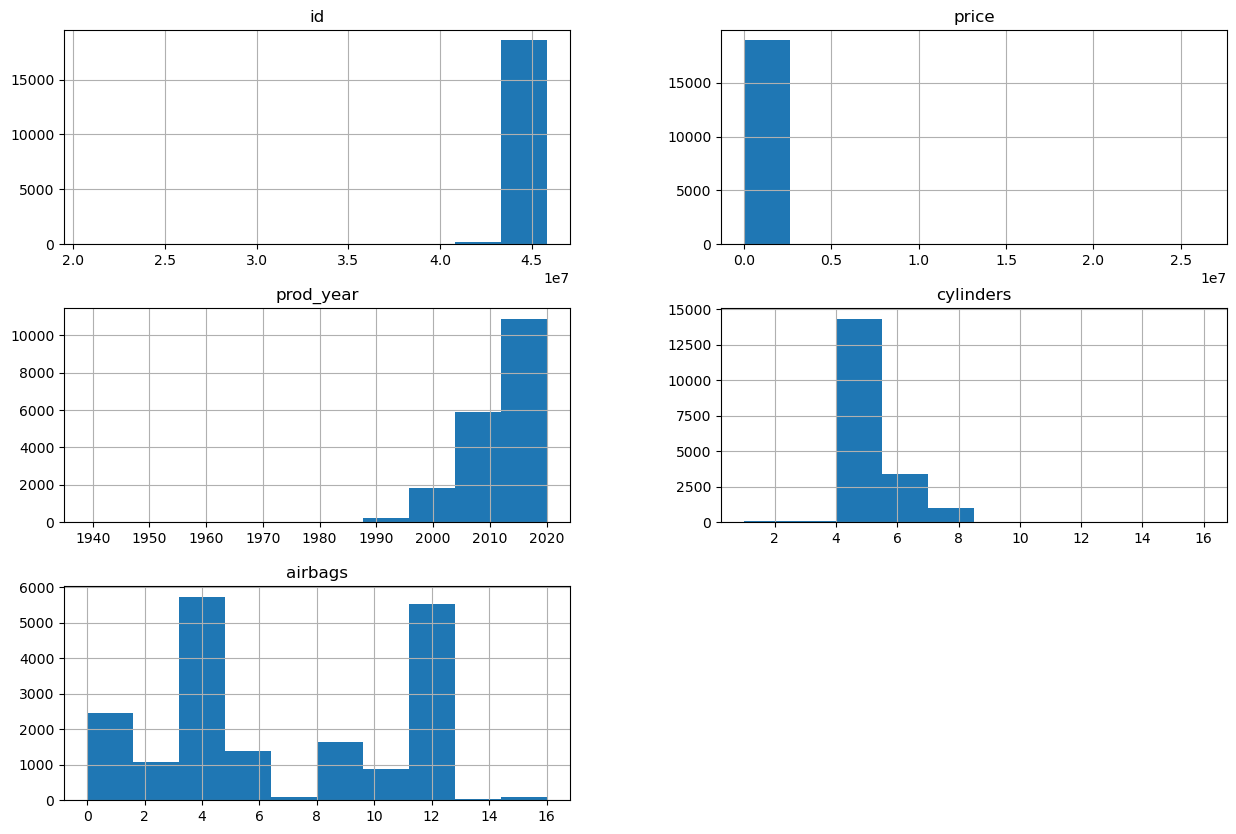

In [17]:
df.hist(bins=10,figsize=(15,10))
plt.show()

In [18]:
df.columns

Index(['id', 'price', 'levy', 'manufacturer', 'model', 'prod_year', 'category',
       'leather_interior', 'fuel_type', 'engine_volume', 'mileage',
       'cylinders', 'gear_box_type', 'drive_wheels', 'doors', 'wheel', 'color',
       'airbags'],
      dtype='object')

In [19]:
top10_manuf=df['manufacturer'].value_counts().sort_values(ascending =False)[:10]
top10_manuf

manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

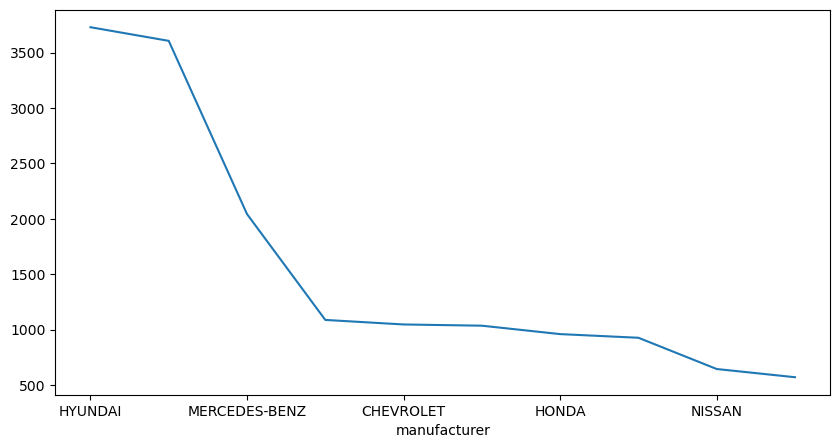

In [20]:
top10_manuf.plot(figsize=(10,5))
plt.show()

In [21]:
top10_mean_prices=(
        df.groupby('manufacturer')['price'].mean()
        .loc[top10_manuf.index]
        .astype(float).round(2)
    
)
top10_mean_prices

manufacturer
HYUNDAI          22306.00
TOYOTA           14302.45
MERCEDES-BENZ    18590.33
FORD             15411.85
CHEVROLET        14894.87
BMW              20609.47
HONDA            14162.07
LEXUS            20052.59
NISSAN            9835.84
VOLKSWAGEN       11471.77
Name: price, dtype: float64

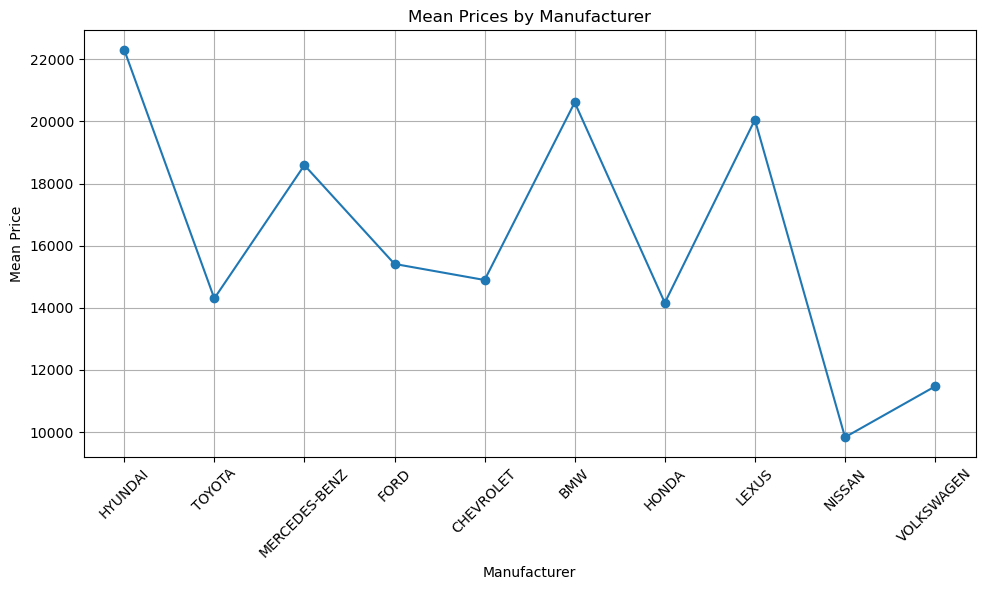

In [22]:
plt.figure(figsize=(10, 6))  
plt.plot(top10_manuf.index, top10_mean_prices, marker='o')  # Use manufacturer names directly for x-axis

# Improve readability
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.title('Mean Prices by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for rotated x labels

plt.show()

In [23]:
df_numeric=df.select_dtypes(include=['number'])
corr=df_numeric.corr()
corr

,id,price,prod_year,cylinders,airbags
id,1.000000,-0.000797,0.072030,-0.040617,-0.022070
price,-0.000797,1.000000,0.012689,0.007435,-0.012709
prod_year,0.072030,0.012689,1.000000,-0.099443,0.235160
cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


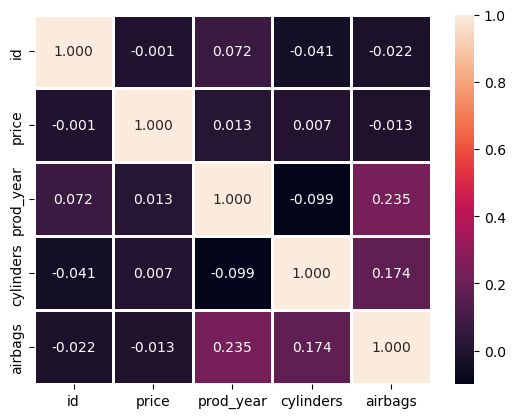

In [24]:
sns.heatmap(corr,lw='1',annot=True,fmt='.3f')
plt.show()

In [25]:
df_cat=df.select_dtypes(include='O')
df_cat

,levy,manufacturer,model,category,leather_interior,fuel_type,engine_volume,mileage,gear_box_type,drive_wheels,doors,wheel,color
0,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,Manual,Rear,02-Mar,Left wheel,Silver
19233,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,Tiptronic,Front,04-May,Left wheel,Red
19234,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,Automatic,Front,04-May,Left wheel,Grey
19235,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,Automatic,Front,04-May,Left wheel,Black


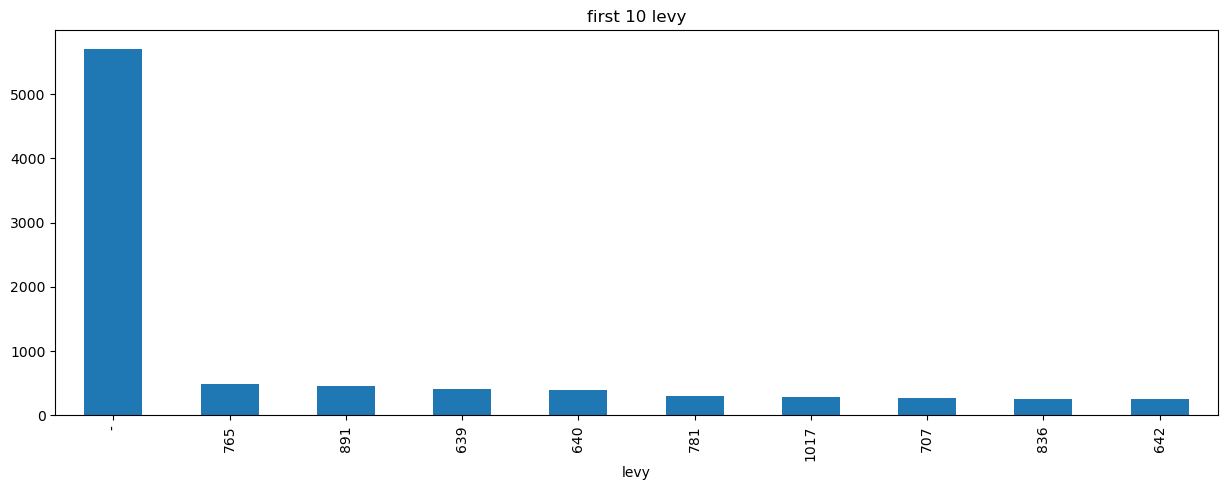

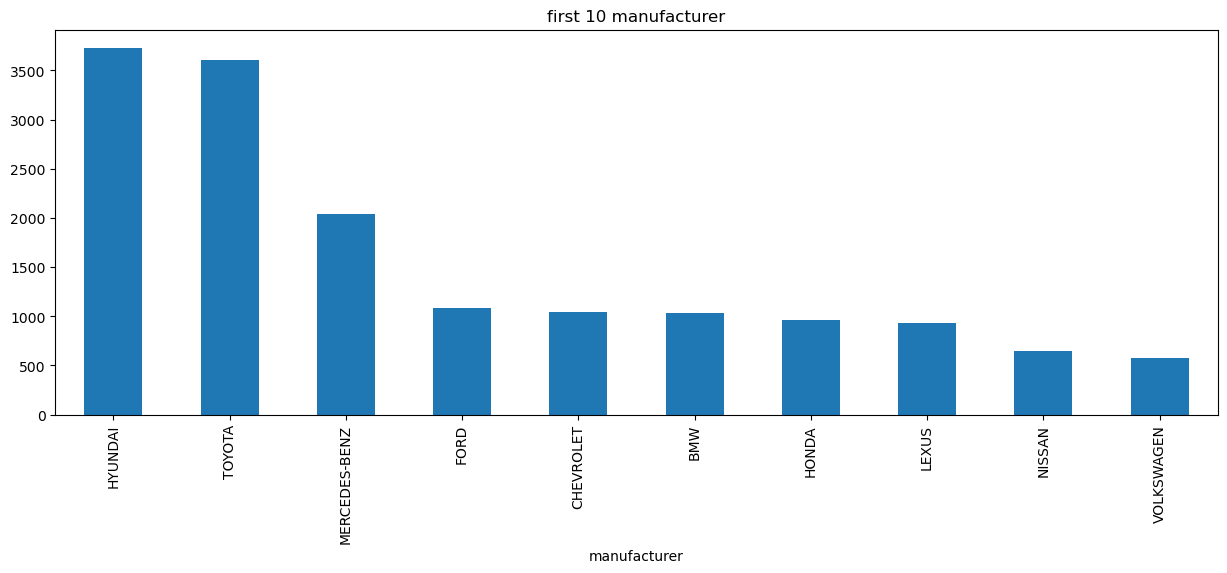

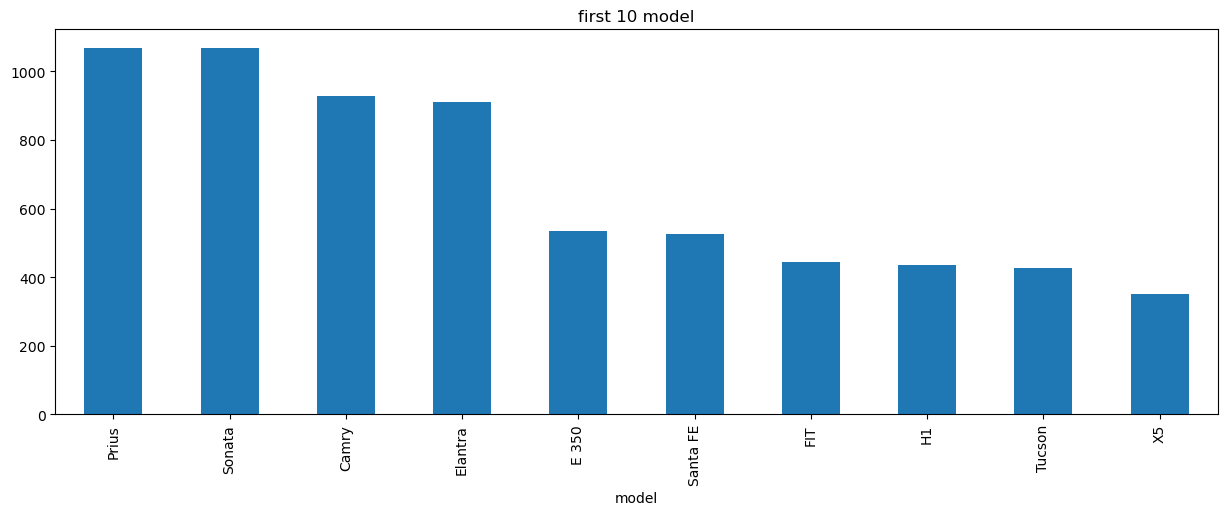

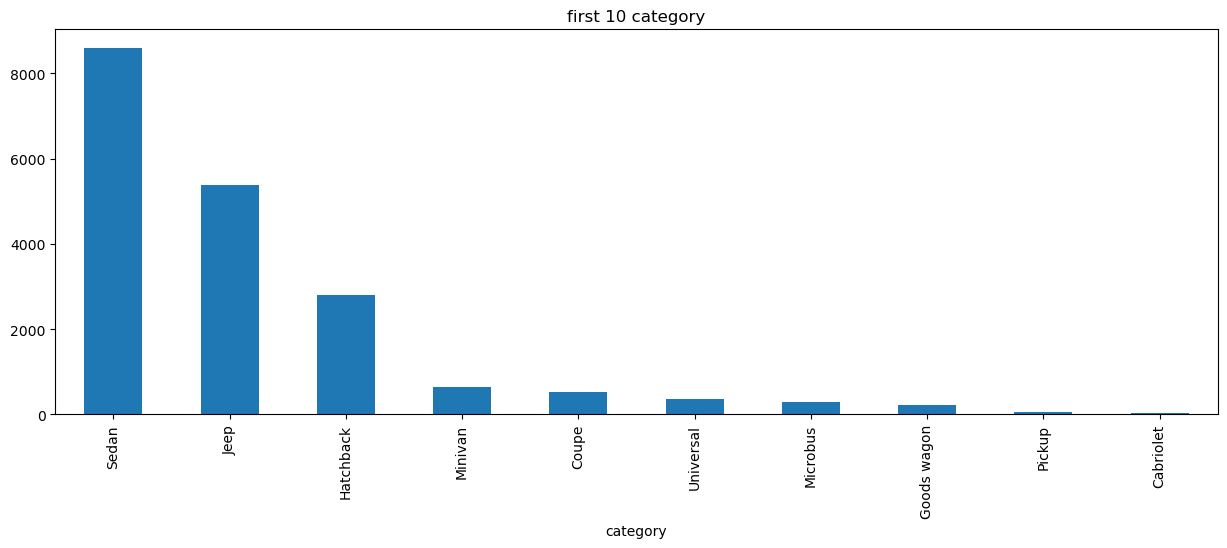

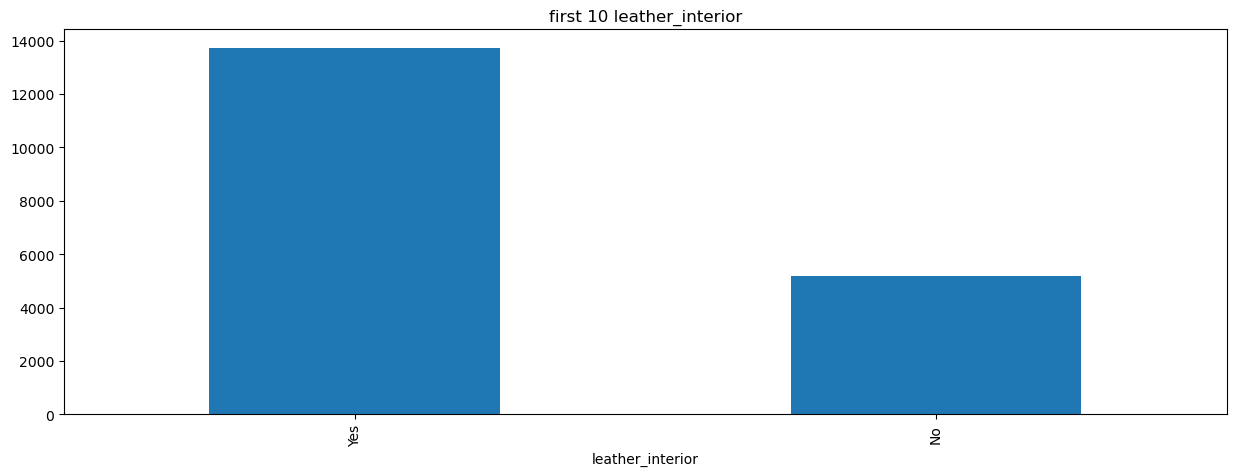

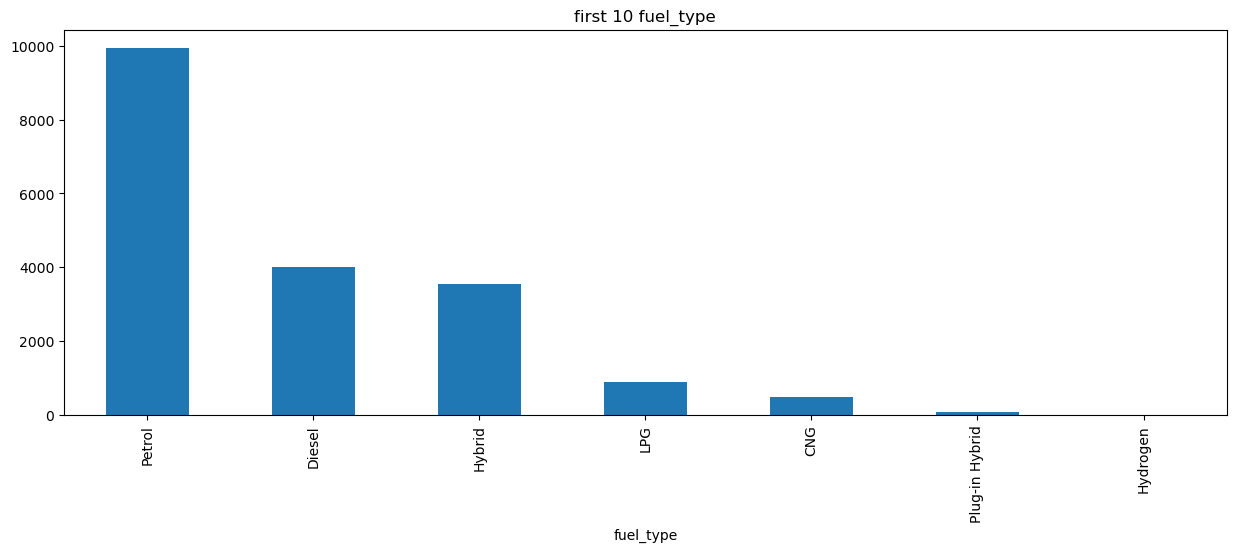

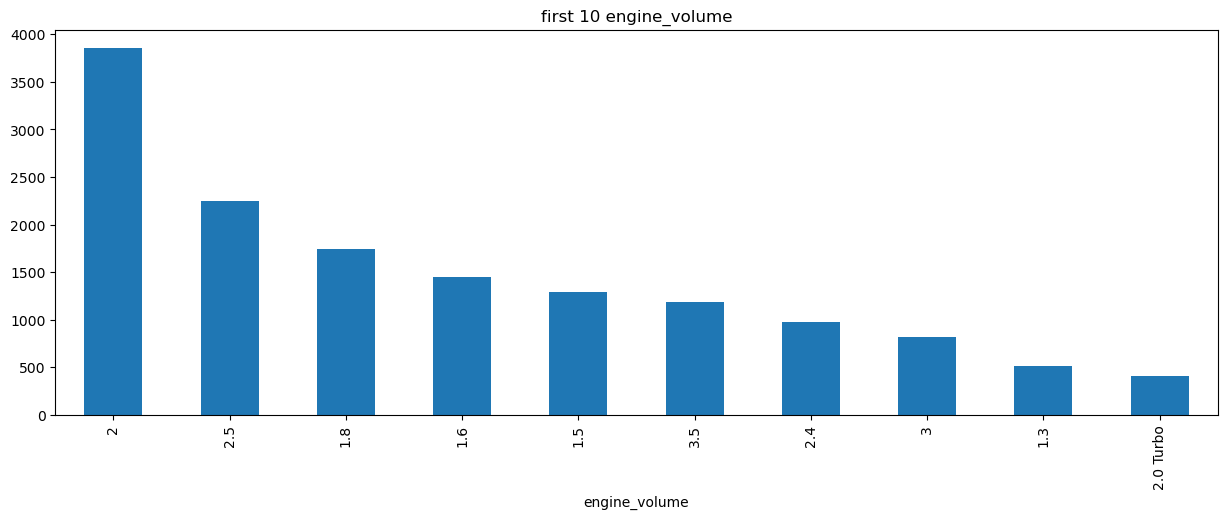

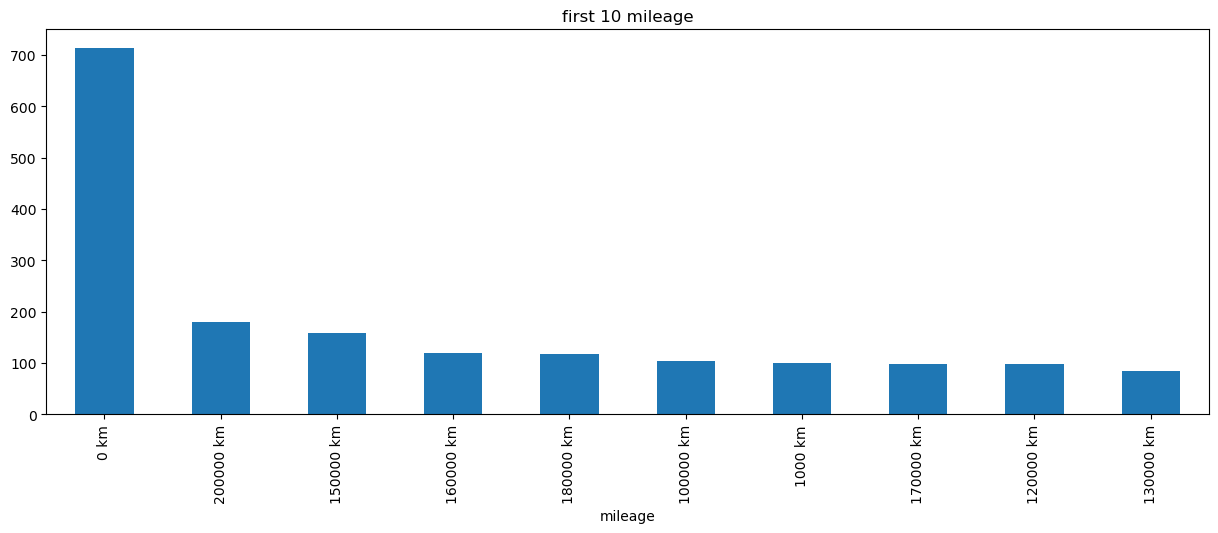

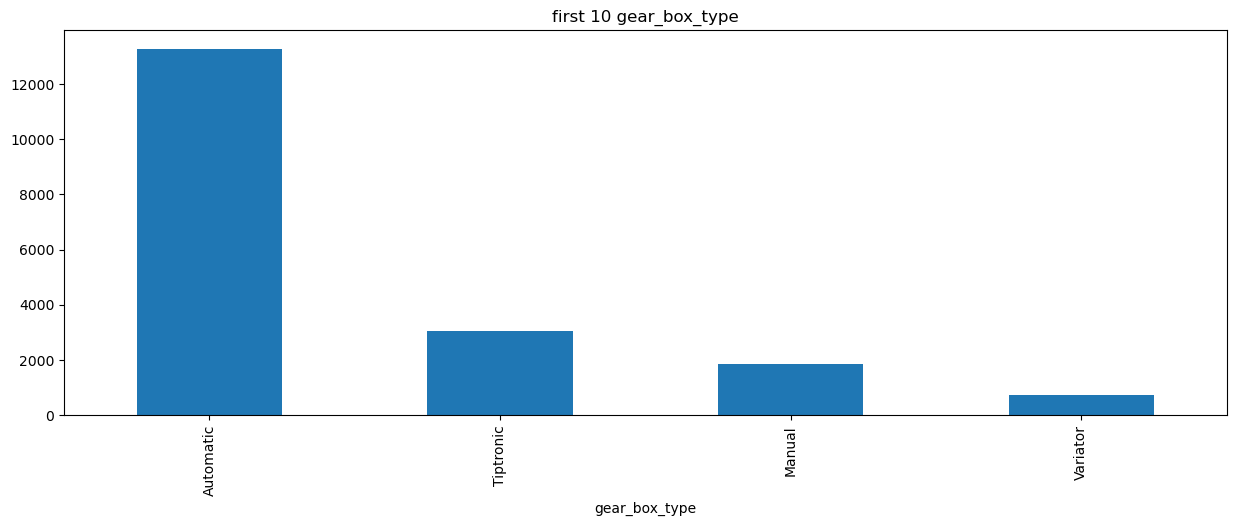

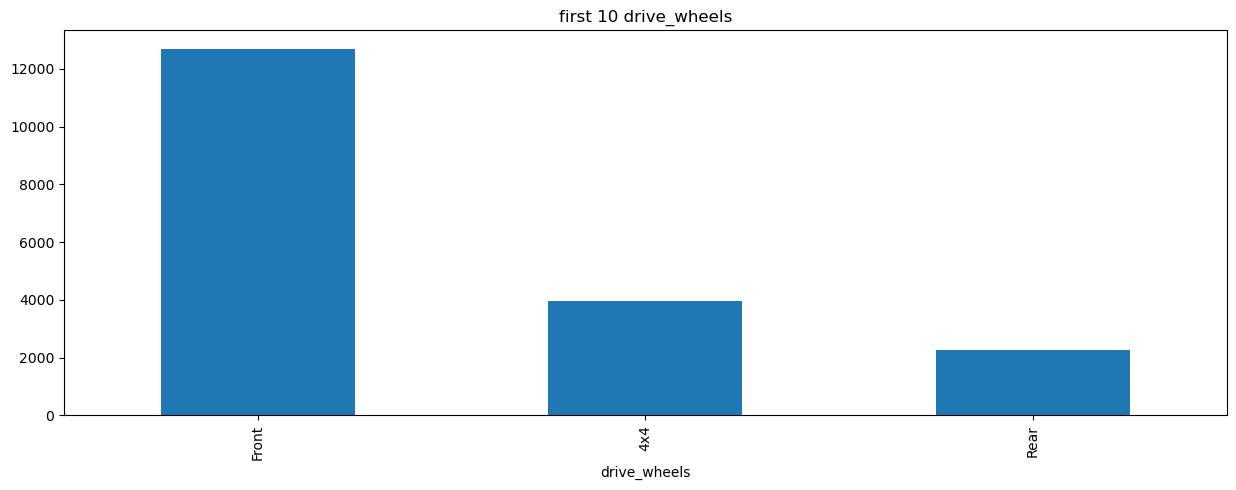

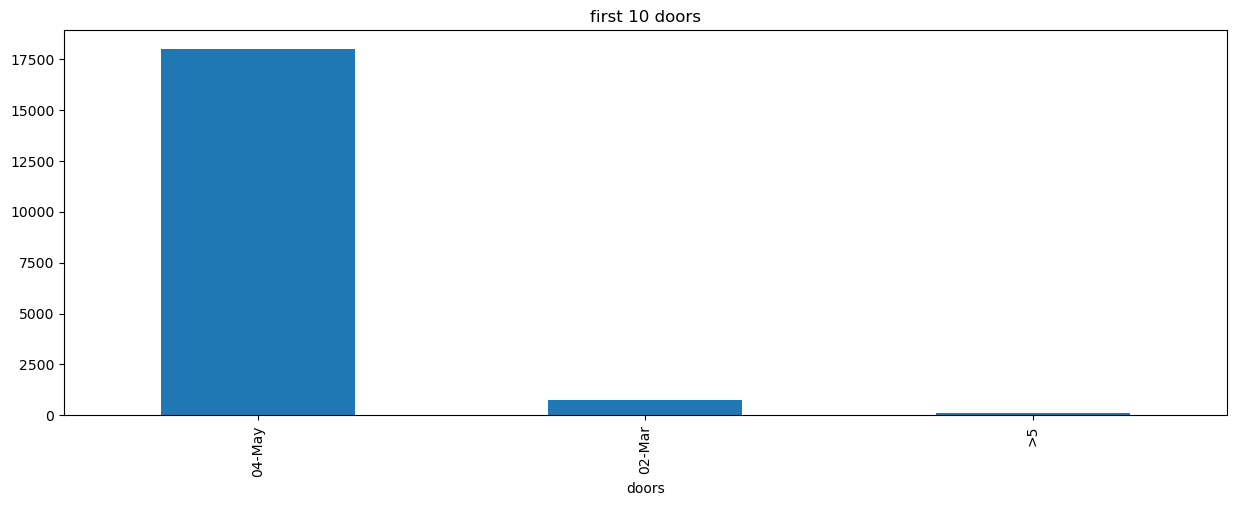

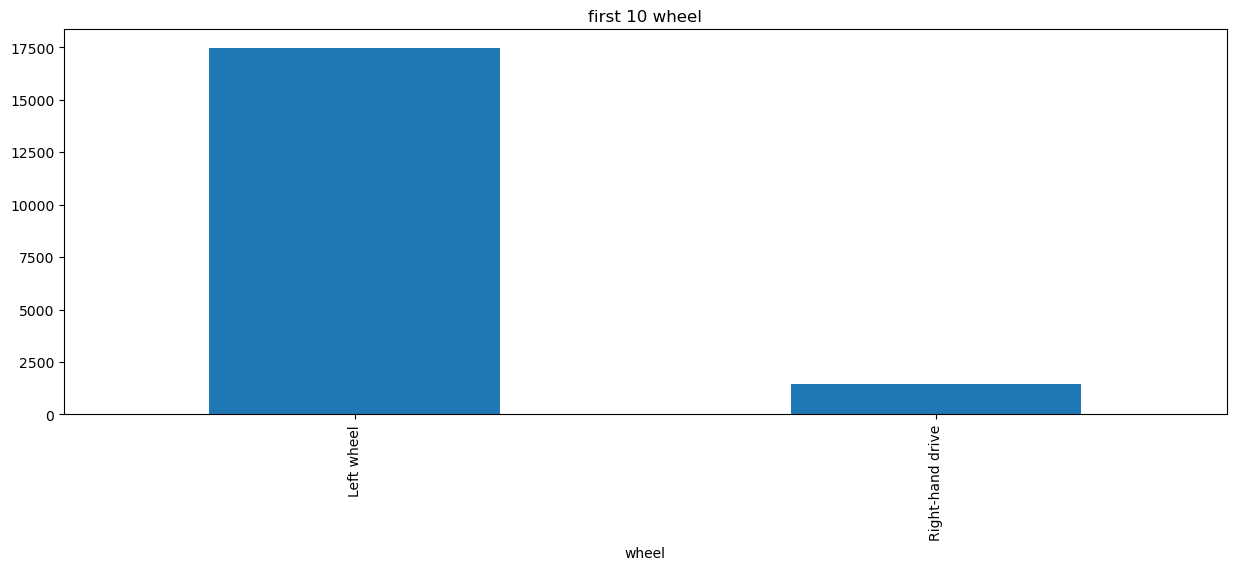

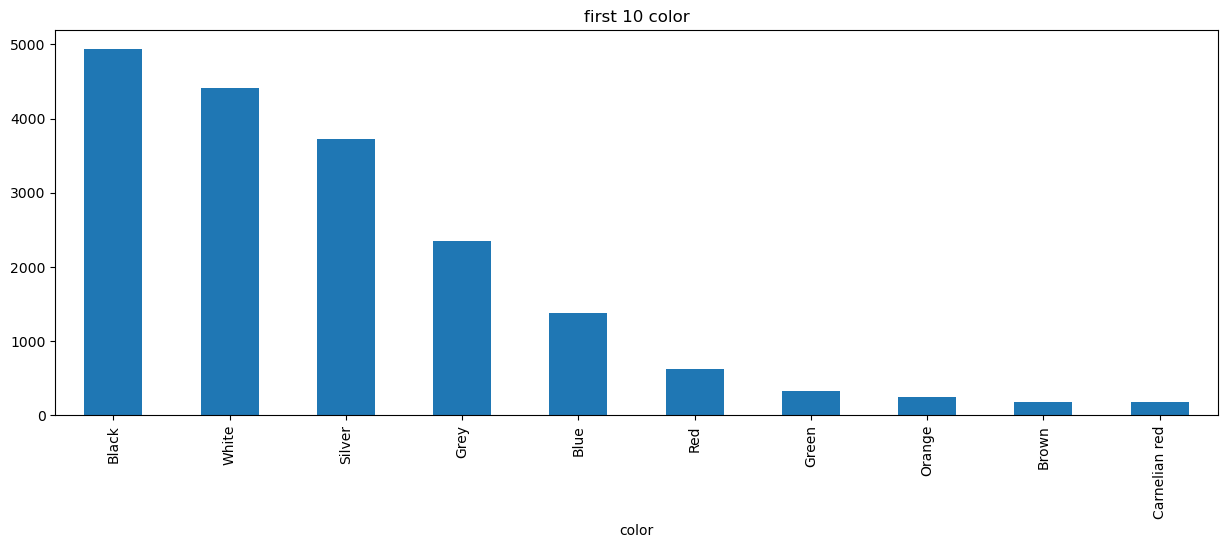

In [26]:
for col in df_cat :
    plt.figure(figsize=(15,5))
    first_10=df[col].value_counts()[:10]
    first_10.plot(kind='bar')
    plt.title('first 10' + ' ' + col)
    plt.show()

# Data Processing

In [27]:
df.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                18924 non-null  int64  
 1   price             18924 non-null  int64  
 2   levy              18924 non-null  object 
 3   manufacturer      18924 non-null  object 
 4   model             18924 non-null  object 
 5   prod_year         18924 non-null  int64  
 6   category          18924 non-null  object 
 7   leather_interior  18924 non-null  object 
 8   fuel_type         18924 non-null  object 
 9   engine_volume     18924 non-null  object 
 10  mileage           18924 non-null  object 
 11  cylinders         18924 non-null  float64
 12  gear_box_type     18924 non-null  object 
 13  drive_wheels      18924 non-null  object 
 14  doors             18924 non-null  object 
 15  wheel             18924 non-null  object 
 16  color             18924 non-null  object 
 17

In [29]:
for col in df.columns:
    print(col ,':' , df[col].unique())

id : [45654403 44731507 45774419 ... 45804997 45793526 45813273]
price : [13328 16621  8467 ... 56814 63886 22075]
levy : ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '59

In [30]:
df['cylinders'].unique()

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

In [31]:
df[['doors']].sample(5)

,doors
7911,04-May
7576,04-May
18403,04-May
9187,04-May
8923,04-May


In [32]:
df['doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [33]:
df=df.drop(columns=['id','doors'])

In [34]:
df.sample()

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,wheel,color,airbags
4080,627,836,TOYOTA,Tacoma,2012,Sedan,Yes,Petrol,2.7,394069 km,4.0,Automatic,Rear,Left wheel,Black,12


# Date of car manufacture till now

In [35]:
# Date of car manufacture till now
import datetime
dtime=datetime.datetime.now()
dtime

datetime.datetime(2025, 12, 7, 8, 48, 33, 687307)

In [36]:
df['car_age']=dtime.year - df['prod_year']

In [37]:
df=df.drop(['prod_year'],axis=1)

# levy

In [38]:
df.levy.replace({'-' : '0'} , inplace=True) # here - was a cell value
df['levy']=df['levy'].astype(int)

# milage

In [39]:
df['mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [40]:
df['mileage']=df['mileage'].str.replace('km' ,'') # here km was in the string


# engine volume

In [41]:
df['engine_volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [42]:
df['engine_volume']=df['engine_volume'].str.replace('Turbo','')
df['engine_volume']=df['engine_volume'].astype(float)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             18924 non-null  int64  
 1   levy              18924 non-null  int64  
 2   manufacturer      18924 non-null  object 
 3   model             18924 non-null  object 
 4   category          18924 non-null  object 
 5   leather_interior  18924 non-null  object 
 6   fuel_type         18924 non-null  object 
 7   engine_volume     18924 non-null  float64
 8   mileage           18924 non-null  object 
 9   cylinders         18924 non-null  float64
 10  gear_box_type     18924 non-null  object 
 11  drive_wheels      18924 non-null  object 
 12  wheel             18924 non-null  object 
 13  color             18924 non-null  object 
 14  airbags           18924 non-null  int64  
 15  car_age           18924 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory us

# Detect the outliers


In [44]:
numeric_cols = df.select_dtypes(exclude='object')
for col in numeric_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((numeric_cols[col] > high)|(numeric_cols[col] < low)).sum()
    total = numeric_cols[col].shape[0]
    print(f"Total outliers in {col} are : {outlier} -> {round(100*(outlier / total),2)} %" )
    # remove outiers
    if outlier >0 :
     df=df.loc[(df[col] <= high) & (df[col] >= low)]

Total outliers in price are : 1055 -> 5.57 %
Total outliers in levy are : 172 -> 0.91 %
Total outliers in engine_volume are : 1358 -> 7.18 %
Total outliers in cylinders are : 4765 -> 25.18 %
Total outliers in airbags are : 0 -> 0.0 %
Total outliers in car_age are : 1777 -> 9.39 %


# Transform DATA

In [45]:
la = LabelEncoder()

category_df = df.select_dtypes(include='object')
numeric_df  = df.select_dtypes(exclude='object')

for col in category_df.columns:
    category_df[col] = la.fit_transform(category_df[col]).astype(int)

df = pd.concat([category_df, numeric_df], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12240 entries, 2 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      12240 non-null  int64  
 1   model             12240 non-null  int64  
 2   category          12240 non-null  int64  
 3   leather_interior  12240 non-null  int64  
 4   fuel_type         12240 non-null  int64  
 5   mileage           12240 non-null  int64  
 6   gear_box_type     12240 non-null  int64  
 7   drive_wheels      12240 non-null  int64  
 8   wheel             12240 non-null  int64  
 9   color             12240 non-null  int64  
 10  price             12240 non-null  int64  
 11  levy              12240 non-null  int64  
 12  engine_volume     12240 non-null  float64
 13  cylinders         12240 non-null  float64
 14  airbags           12240 non-null  int64  
 15  car_age           12240 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 1.6 MB

In [47]:
df.head()

,manufacturer,model,category,leather_interior,fuel_type,mileage,gear_box_type,drive_wheels,wheel,color,price,levy,engine_volume,cylinders,airbags,car_age
2,16,347,3,0,4,2493,3,1,1,1,8467,0,1.3,4.0,2,19
3,12,334,4,1,2,1954,0,0,0,14,3607,862,2.5,4.0,0,14
4,16,347,3,1,4,5679,0,1,0,12,11726,446,1.3,4.0,4,11
5,17,683,4,1,1,1778,0,1,0,14,39493,891,2.0,4.0,4,9
6,43,616,3,1,2,3046,0,1,0,14,1803,761,1.8,4.0,12,15


# Feature Engineering
to inc model performance

In [49]:
# --- price per mileage gives car “value” ---
df['price_per_mileage'] = df['price'] / (df['mileage'] + 1)

# --- engine power ---
df['engine_power'] = df['engine_volume'] * df['cylinders']

# --- manufacturer average price (powerful feature) ---
df['brand_mean_price'] = df.groupby('manufacturer')['price'].transform('mean')

# --- model average price ---
df['model_mean_price'] = df.groupby('model')['price'].transform('mean')


In [76]:
n_df=df.copy()
# drop noise
drop_cols = ['color', 'drive_wheels', 'airbags']
n_df= n_df.drop(columns=drop_cols, errors='ignore')

In [77]:
n_df.head()

,manufacturer,model,category,leather_interior,fuel_type,mileage,gear_box_type,wheel,price,levy,engine_volume,cylinders,car_age,price_per_mileage,engine_power,brand_mean_price,model_mean_price
2,16,347,3,0,4,2493,3,1,8467,0,1.3,4.0,19,3.394948,5.2,11663.516255,11243.486683
3,12,334,4,1,2,1954,0,0,3607,862,2.5,4.0,14,1.845013,10.0,12815.971795,9317.342342
4,16,347,3,1,4,5679,0,0,11726,446,1.3,4.0,11,2.064437,5.2,11663.516255,11243.486683
5,17,683,4,1,1,1778,0,0,39493,891,2.0,4.0,9,22.199550,8.0,19182.035607,30727.728324
6,43,616,3,1,2,3046,0,0,1803,761,1.8,4.0,15,0.591730,7.2,12774.138832,11415.997087


In [73]:
n_df.shape

(12240, 20)

In [80]:
for col in df.columns:
    print(col ,':' , df[col].unique())

manufacturer : [16 12 17 43 27 45 35 31  6 41  9  3 21 30 40 26 14 11 42 24 32  2  8 29
 10 23 20  0 44 19 39  7 25  4 33 47 15  5 38 18 34 22 28 36 46  1 37 13]
model : [347 334 683 616 697 194 167 313 294 430 469 623  99 336 226 545 300 484
 273 397 776  66 770 213 556 836 269 577 383 504  37 416 725 377 611  94
 499  63 689 652 812 743 445  40 328  67 660 217   2 145 810 758 778 746
 344 447 427 175 784 657 694 595 119 223 184 112 245 672 411 691 751 152
  91 676 654 304 263 118 523 232 581 199 525 461  98 798 414 231 153 658
 407 124 104 571 692 509 332 808  80 497  30 329 158 821 661 109 249 171
 371 239 235  74 254 649 570 501 462 374 534 537 686  25 559 720 529 437
 709 323 117 308 680  51 279 258 246 673  83 648  86 428 444 285 185  89
 406 393 468 238 761 833 105 549 636 717   3 306 721 792 366 216 737 284
 739 744  73 846 450 275 452   8 760 582 612 224 841  16 832 207 500 567
 538 466 454 753 688 394 696  69 481 251  36 831 763 326 198 365 467 243
 557 265  65 188 698 137 70

# Model

In [52]:
df.columns

Index(['manufacturer', 'model', 'category', 'leather_interior', 'fuel_type',
       'mileage', 'gear_box_type', 'drive_wheels', 'wheel', 'color', 'price',
       'levy', 'engine_volume', 'cylinders', 'airbags', 'car_age',
       'price_per_mileage', 'engine_power', 'brand_mean_price',
       'model_mean_price'],
      dtype='object')

In [53]:
x=n_dfn_df.drop('price',axis=1)
y=n_df['price']

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [55]:
algorithms=[ 'LinearRegression',
    'DecisionTreeRegressor',
    'RandomForestRegressor',
    'GradientBoostingRegressor',
    'XGBRegressor',
    'CatBoostRegressor',
    'SVR']
R2=[]
RMSE=[]

In [57]:
def models(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f"The score of the model is : {score}" )

In [58]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = XGBRegressor()
model6 = CatBoostRegressor(
    depth=8,
    learning_rate=0.05,
    iterations=2000,
    loss_function='RMSE',
    random_seed=42,
    verbose=200
)

model7 = SVR()

In [59]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)
models(model6)
models(model7)


The score of the model is : 0.4676990406746564
The score of the model is : 0.9551745563387878
The score of the model is : 0.9811583117233841
The score of the model is : 0.9589305730456826
The score of the model is : 0.9867159724235535
0:	learn: 10900.6633168	total: 182ms	remaining: 6m 3s
200:	learn: 1396.0457150	total: 1.87s	remaining: 16.8s
400:	learn: 850.8729471	total: 3.55s	remaining: 14.1s
600:	learn: 641.9751335	total: 5.22s	remaining: 12.1s
800:	learn: 519.0439620	total: 6.9s	remaining: 10.3s
1000:	learn: 439.2148384	total: 8.6s	remaining: 8.58s
1200:	learn: 388.3103797	total: 10.3s	remaining: 6.85s
1400:	learn: 349.4540056	total: 12s	remaining: 5.12s
1600:	learn: 321.0192571	total: 13.7s	remaining: 3.41s
1800:	learn: 298.0188459	total: 15.3s	remaining: 1.7s
1999:	learn: 280.3644057	total: 17s	remaining: 0us
The score of the model is : 0.9928424968005338
The score of the model is : 0.057757331056724204


In [60]:
print(len(algorithms), len(R2), len(RMSE))


7 7 7


In [61]:
data=pd.DataFrame({'Algorithms' :algorithms , 'R2_score' :R2 , 'RMSE' :RMSE})
data

,Algorithms,R2_score,RMSE
0,LinearRegression,0.467699,8119.939783
1,DecisionTreeRegressor,0.955175,2356.332007
2,RandomForestRegressor,0.981158,1527.685974
3,GradientBoostingRegressor,0.958931,2255.451567
4,XGBRegressor,0.986716,1282.740426
5,CatBoostRegressor,0.992842,941.575088
6,SVR,0.057757,10803.278393


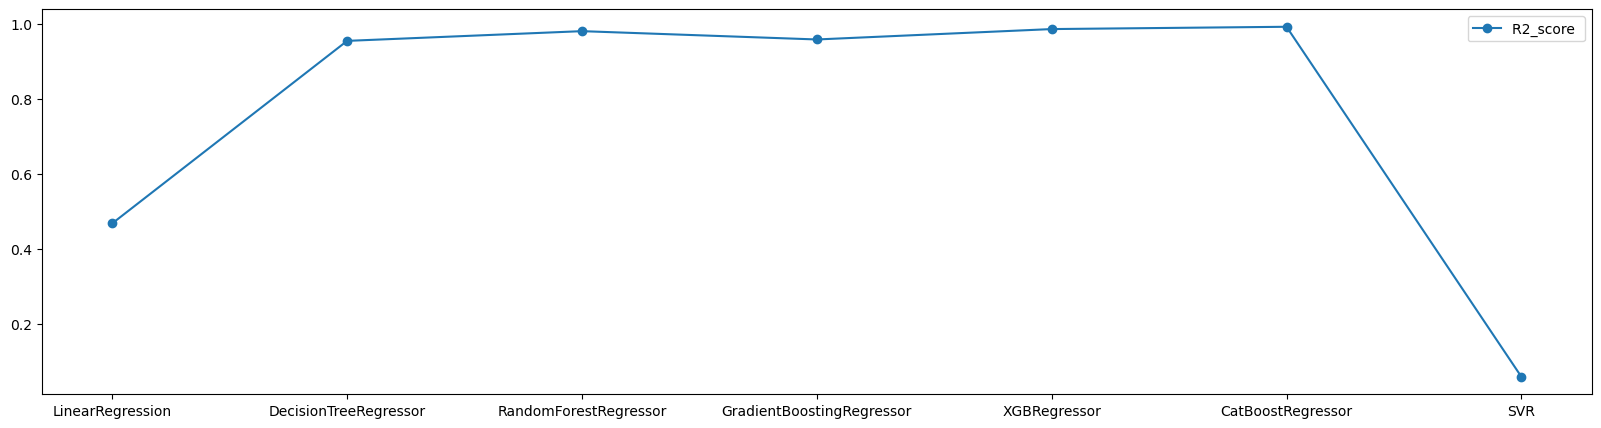

In [62]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(data.Algorithms,data.R2_score,label='R2_score ',marker='o')
plt.legend()
plt.show()

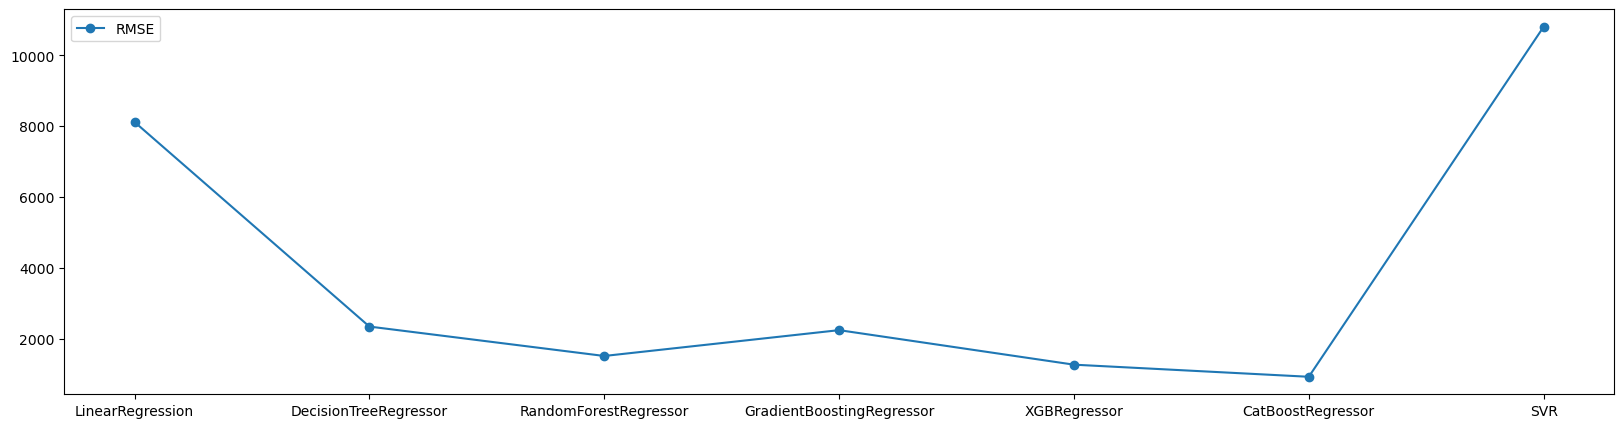

In [63]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(data.Algorithms,data.RMSE,label='RMSE',marker='o')
plt.legend()
plt.show()

# USe mode to predict data

In [65]:
import pickle

In [66]:
file_name='cars_prediction.sav'

In [67]:
with open(file_name,'wb')as f:
    pickle.dump(model6,f)